In [1]:
# import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import regex
import country_converter as coco
import warnings
warnings.filterwarnings("ignore")

In [2]:
salary=pd.read_csv(r"C:\Users\Mario\Documents\Labs\Module2\Project_Week5\ds_salaries.csv")
salary.head(3)
salary.drop(["Unnamed: 0"], axis=1, inplace=True)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [3]:
standard_names_empl = coco.convert(salary['employee_residence'], to='name')
salary['employee_residence'] = standard_names_empl
standard_names_comp = coco.convert(salary['company_location'], to='name')
salary['company_location'] = standard_names_comp
salary['experience_level'] = salary['experience_level'].replace({'EN':'Entry-Level', 'MI':'Mid-Level', 'SE':'Senior-Level', 'EX':'Executive-Level/Director'})
salary['company_size'] = salary['company_size'].replace({'S':'Small (<50)', 'M':'Medium (50-250)', 'L':'Large (250+)'})
salary['employment_type'] = salary['employment_type'].replace({'FT':'Full-time', 'PT':'Part-time', 'CT':'Contract', 'FL':'Freelance'})
salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,Full-time,Data Scientist,70000,EUR,79833,Germany,0,Germany,Large (250+)
1,2020,Senior-Level,Full-time,Machine Learning Scientist,260000,USD,260000,Japan,0,Japan,Small (<50)
2,2020,Senior-Level,Full-time,Big Data Engineer,85000,GBP,109024,United Kingdom,50,United Kingdom,Medium (50-250)
3,2020,Mid-Level,Full-time,Product Data Analyst,20000,USD,20000,Honduras,0,Honduras,Small (<50)
4,2020,Senior-Level,Full-time,Machine Learning Engineer,150000,USD,150000,United States,50,United States,Large (250+)
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior-Level,Full-time,Data Engineer,154000,USD,154000,United States,100,United States,Medium (50-250)
603,2022,Senior-Level,Full-time,Data Engineer,126000,USD,126000,United States,100,United States,Medium (50-250)
604,2022,Senior-Level,Full-time,Data Analyst,129000,USD,129000,United States,0,United States,Medium (50-250)
605,2022,Senior-Level,Full-time,Data Analyst,150000,USD,150000,United States,100,United States,Medium (50-250)


In [4]:
salary.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
salary.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<AxesSubplot:>

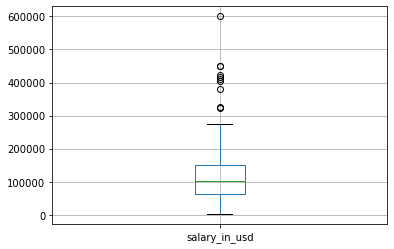

In [6]:
salary.boxplot(column=["salary_in_usd"])

In [7]:
salary["salary_in_usd"].nlargest(10)

252    600000
33     450000
97     450000
157    423000
225    416000
63     412000
523    405000
519    380000
25     325000
482    324000
Name: salary_in_usd, dtype: int64

In [40]:
job_title=salary.groupby(["job_title"]).agg({'job_title':'count'}).rename(columns={'job_title': 'Number of jobs'})
job_title

,Number of jobs
job_title,
3D Computer Vision Researcher,1
AI Scientist,7
Analytics Engineer,4
Applied Data Scientist,5
Applied Machine Learning Scientist,4
BI Data Analyst,6
Big Data Architect,1
Big Data Engineer,8
Business Data Analyst,5


In [9]:
experience=salary.groupby(["experience_level"]).agg({"experience_level":"count"})
experience

,experience_level
experience_level,
Entry-Level,88
Executive-Level/Director,26
Mid-Level,213
Senior-Level,280


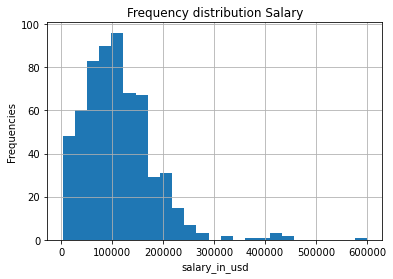

In [10]:

plt.hist(salary["salary_in_usd"],bins=25)
plt.xlabel("salary_in_usd")
plt.ylabel('Frequencies') 
plt.title('Frequency distribution Salary')
plt.grid()
plt.show()

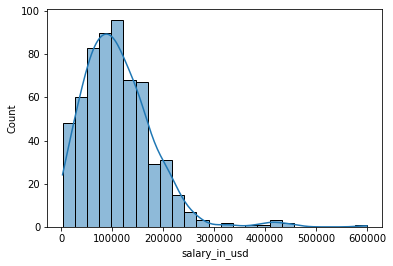

In [11]:
sns.histplot(salary['salary_in_usd'], bins=25, kde=True);

In [4]:
x=salary["experience_level"].value_counts()
x


Senior-Level                280
Mid-Level                   213
Entry-Level                  88
Executive-Level/Director     26
Name: experience_level, dtype: int64

In [13]:
#x=list(x)
x

[280, 213, 88, 26]

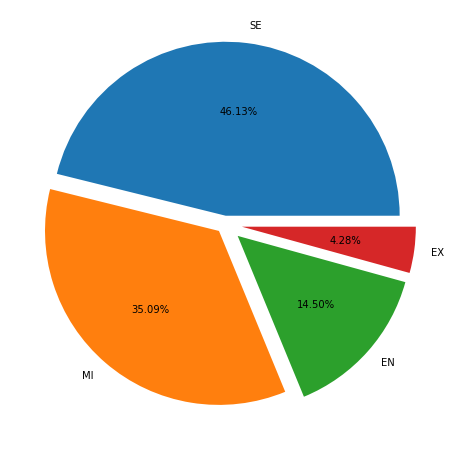

In [6]:

labels=["SE","MI","EN","EX"]
explode = (0.05, 0.05, 0.1,0.1)
fig = plt.figure(figsize = (8, 8))
plt.pie(x,labels=labels, explode=explode,autopct='%1.2f%%')
plt.show()

#### plt.figure(figsize=(14,8), dpi=200)


sns.scatterplot((salary["job_title"]),salary["salary_in_usd"],hue=salary["experience_level"]).set(title="Analysis in between Job Title and Salary related with Experience Level")
plt.xticks(rotation = 90);

In [16]:
salary.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [17]:
g = sns.JointGrid(data=ibm, x="Age", y="MonthlyIncome", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=ibm["Attrition"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6) 
plt.show; 

NameError: name 'ibm' is not defined

In [18]:

# Read the geopandas dataset
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# Merge the two DataFrames together

# Create a map
my_map = folium.Map()
# Add the data
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['employee_residence'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='ggggg'
).add_to(my_map)

NameError: name 'geopandas' is not defined

In [ ]:
!pip install geopandas